***
<h2 style="font-size: 25px; font-family: 'Algerian'; color: green; text-align: center;">Aplicación de filtros y clasificación de imágenes </h2>

***

<p style="font-size: 15px; font-family: 'Arial'; color: black; text-align: justify; text-indent: 20px">
En este proyecto se desarrolló un sistema de clasificación de imágenes de frutas utilizando un modelo de <i>red neuronal convolucional (CNN)</i>. Como paso preliminar, se aplicaron distintos filtros visuales como <i>CLAHE</i>, <i>desenfoque gaussiano (blur)</i> y <i>detección de bordes con Canny</i> con el fin de explorar características relevantes en las imágenes. El filtro <i>CLAHE</i> fue especialmente importante, ya que mejora el contraste local y puede facilitar al modelo la identificación de texturas y bordes útiles para la clasificación.
</p>

<p style="font-size: 15px; font-family: 'Arial'; color: black; text-align: justify; text-indent: 20px">
El modelo <i>CNN</i> propuesto fue entrenado con imágenes del dataset <i>Fruits and Vegetables Image Recognition Dataset</i> (disponible en Kaggle), seleccionando arbitrariamente 10 clases correspondientes únicamente a frutas. Con el objetivo de aumentar la diversidad del conjunto de datos, se agregaron 10 imágenes adicionales tomadas del dataset <i>Fruits360</i>, asegurando que coincidieran con las frutas previamente seleccionadas. El modelo fue diseñado utilizando una arquitectura sencilla pero efectiva compuesta por capas convolucionales, de <i>pooling</i>, <i>dropout</i> y <i>softmax</i>. Se empleó aumento de datos mediante rotación, zoom y desplazamiento para mejorar la generalización del modelo. Durante el entrenamiento se monitoreó la evolución del rendimiento mediante las métricas de <i>accuracy</i> y <i>loss</i>, y se evaluó la capacidad del modelo para distinguir entre clases mediante una <i>matriz de confusión</i>.
</p>

<p style="font-size: 15px; font-family: 'Arial'; color: black; text-align: justify; text-indent: 20px">
El modelo logró una precisión de validación del 56.41 %. Si bien este resultado no representa un alto desempeño, es razonable considerando que el conjunto de datos fue limitado a 10 clases y que el número de imágenes por clase no fue particularmente alto. Además, el modelo fue entrenado con una arquitectura relativamente simple y sin un ajuste de hiperparámetros exhaustivo. Aun así, los resultados permiten observar tendencias claras en la capacidad del modelo para distinguir entre diferentes tipos de frutas, lo cual sienta una base sólida para futuras mejoras, como el uso de modelos preentrenados o el incremento del tamaño del dataset.
</p>

2025-05-03 16:44:10.570634: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 16:44:10.650636: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 16:44:10.708757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746312250.765988    4344 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746312250.794853    4344 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746312250.934788    4344 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

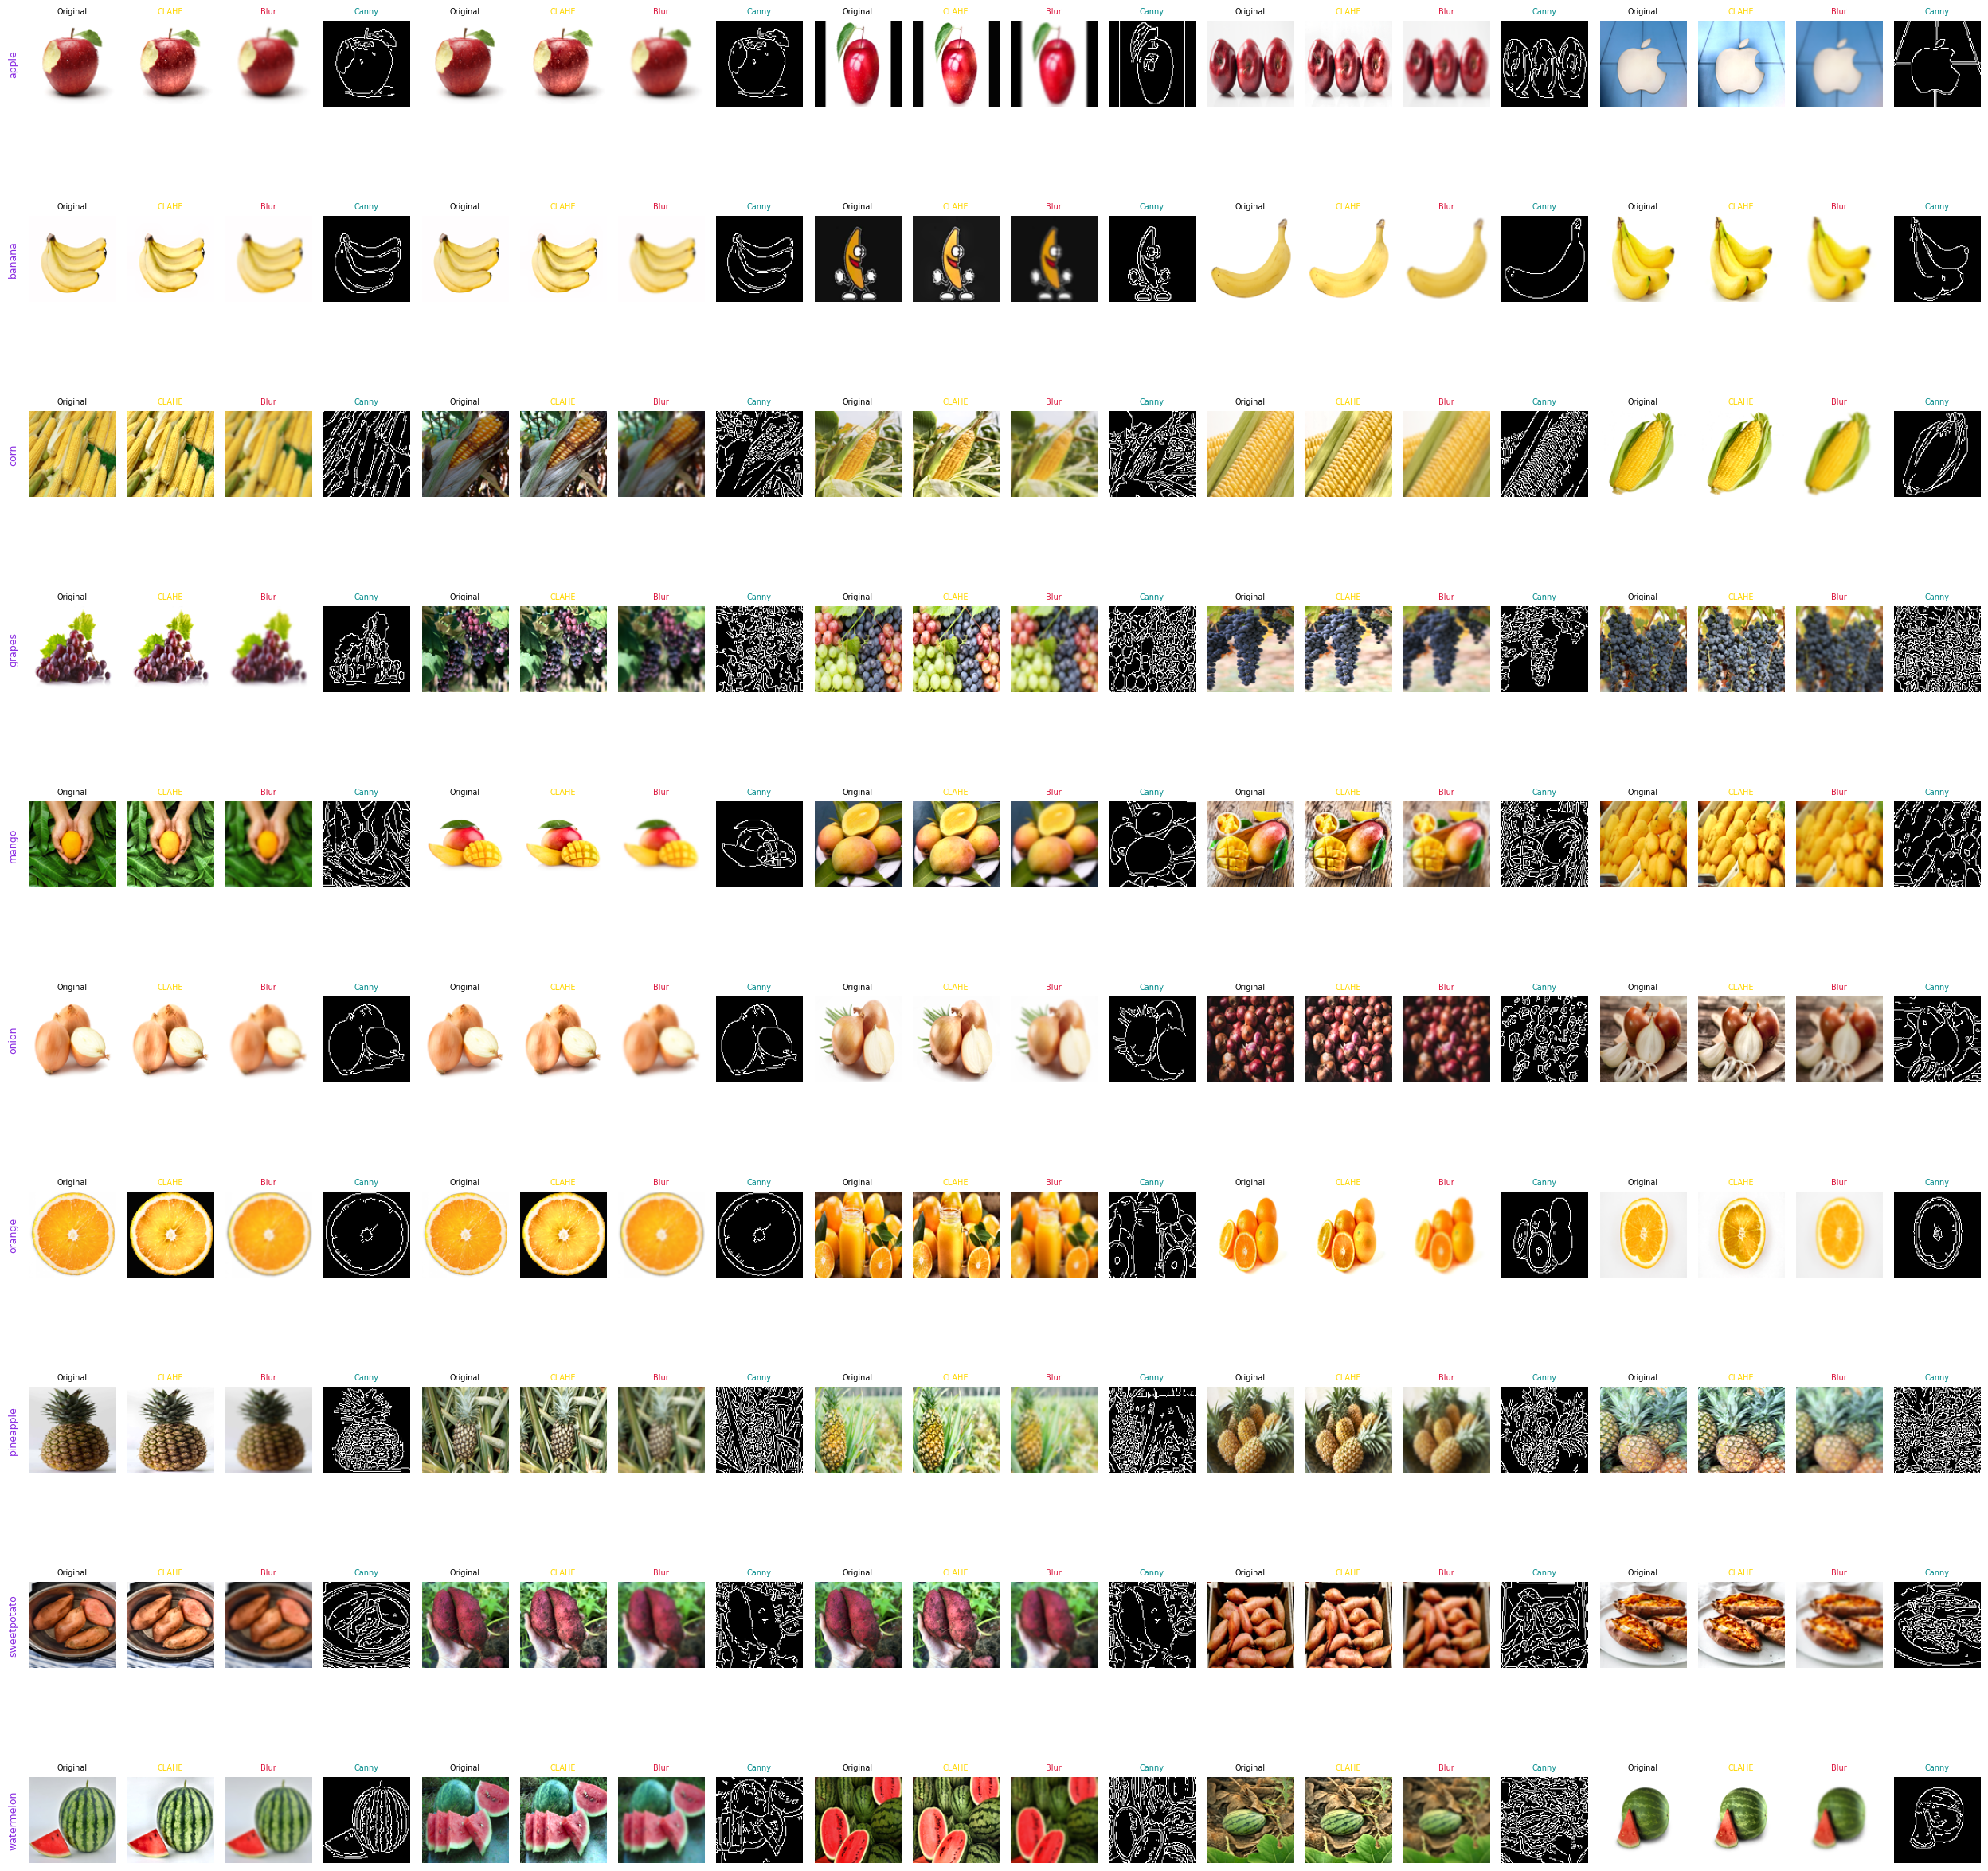

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
import os
from PIL import Image

# Se extraerá el dataset de la Ruta en el ordenador.
directory = r'/home/carlos/Downloads/test'


#Se comenzará con la aplicación de filtros a las primeras 5 imágenes de cada carpeta.
def apply_clahe(img_array):
    lab = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit = 3.0, tileGridSize = (8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)

def apply_blur(img_array):
    return cv2.GaussianBlur(img_array, (5, 5), 0)

def apply_canny(img_array):
    gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    

# Se tomarán las subcarpetas (clases de frutas) de la carpeta principal.
class_dirs = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])[:10]


# Se formará una figura que contenga a las imágenes originales y sus respectivos filtros.
fig, axes = plt.subplots(len(class_dirs), 4*5, figsize = (25, 2.5 * len(class_dirs)))
fig.subplots_adjust(hspace=0.5)

for i, class_name in enumerate(class_dirs):
    class_path = os.path.join(directory, class_name)
    img_files = sorted(os.listdir(class_path))[:5]

    for j, img_name in enumerate(img_files):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).resize((100, 100))
        img_array = np.array(img)

        clahe_img = apply_clahe(img_array)
        blur_img = apply_blur(img_array)
        canny_img = apply_canny(img_array)

        col = j * 4

        axes[i, col].imshow(img_array)
        axes[i, col].set_title("Original", fontsize = 7)
        axes[i, col].axis('off')

        axes[i, col + 1].imshow(clahe_img)
        axes[i, col + 1].set_title("CLAHE", fontsize = 7, color = 'gold')
        axes[i, col + 1].axis('off')

        axes[i, col + 2].imshow(blur_img)
        axes[i, col + 2].set_title("Blur", fontsize = 7, color = 'crimson')
        axes[i, col + 2].axis('off')

        axes[i, col + 3].imshow(canny_img)
        axes[i, col + 3].set_title("Canny", fontsize = 7, color = 'darkcyan')
        axes[i, col + 3].axis('off')


# Se hace una etiqueta para cada fila según su clase.
for i, class_name in enumerate(class_dirs):
    axes[i, 0].text(-25, 50, class_name, fontsize = 9, verticalalignment = 'center', rotation = 90,
                    color = 'blueviolet')

plt.tight_layout()
plt.show()

Found 160 images belonging to 10 classes.
Found 39 images belonging to 10 classes.


/home/carlos/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,372,874 (12.87 MB)

 Trainable params: 3,372,874 (12.87 MB)

 Non-trainable params: 0 (0.00 B)

/home/carlos/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 925ms/step - accuracy: 0.1197 - loss: 2.3910 - val_accuracy: 0.0769 - val_loss: 2.2871
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 783ms/step - accuracy: 0.2064 - loss: 2.2378 - val_accuracy: 0.2821 - val_loss: 2.1239
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 679ms/step - accuracy: 0.2981 - loss: 2.0191 - val_accuracy: 0.2564 - val_loss: 1.8946
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 762ms/step - accuracy: 0.3774 - loss: 1.6975 - val_accuracy: 0.3333 - val_loss: 1.8590
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 712ms/step - accuracy: 0.3869 - loss: 1.6455 - val_accuracy: 0.4103 - val_loss: 1.7425
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 685ms/step - accuracy: 0.4249 - loss: 1.5981 - val_accuracy: 0.4359 - val_loss: 1.8026
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 761ms/step - accuracy: 0.4353 - loss: 1.4832 - val_accuracy: 0.3333 - val_loss: 1.7382
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 772ms/step - accuracy: 0.4690 - loss: 1.3764 - val_accuracy: 0.4103 - val_loss:

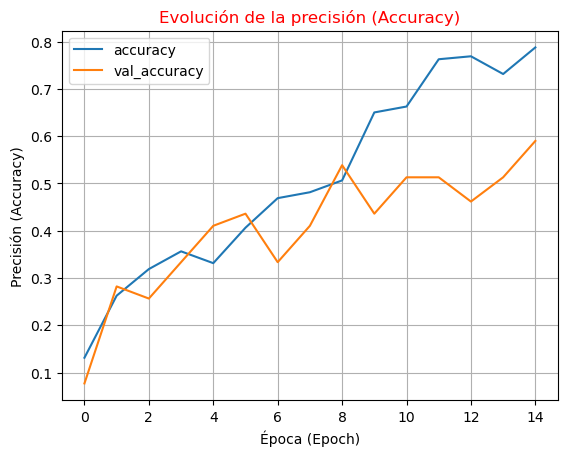

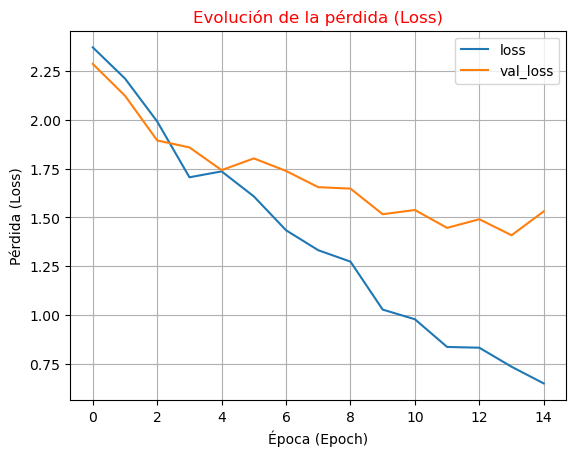

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


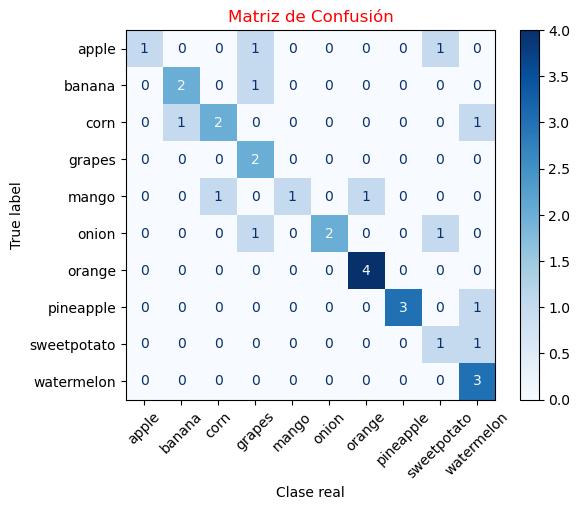

In [8]:
# Se hará un generador de datos con aumentos para ayudar durante el entrenamiento.
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


# Se definirán los generadores para entrenamiento y validación
train_gen = datagen.flow_from_directory(
    directory,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

val_gen = datagen.flow_from_directory(
    directory,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)


# Se formará el modelo CNN simple y utilizará el optimizador Adam
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(train_gen.class_indices), activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


# Se comenzará con el entrenamiento del modelo
epochs = 15
history = model.fit(train_gen, validation_data = val_gen, epochs = epochs)


# Ahora se evaluará el modelo
val_loss, val_acc = model.evaluate(val_gen)
print(f"\nPrecisión en validación: {val_acc:.4f}")


# Como ayuda visual, se mostrarán las gáficas de precisión y pérdida en el entrenamiento
#a lo largo de las épocas.
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Evolución de la precisión (Accuracy)", color = "red")
plt.xlabel("Época (Epoch)")
plt.ylabel("Precisión (Accuracy)")
plt.grid(True)
plt.show()

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Evolución de la pérdida (Loss)", color = "red")
plt.xlabel("Época (Epoch)")
plt.ylabel("Pérdida (Loss)")
plt.grid(True)
plt.show()


# Se mostrará cuántas predicciones fueron conrrectas o incorrectas
#para cada clase con una matriz de confusión.
val_images, val_labels = next(val_gen)
predictions = model.predict(val_images)
prediction_label = np.argmax(predictions, axis = 1)
true_labels = np.argmax(val_labels, axis = 1)
class_names = list(train_gen.class_indices.keys())

cm = confusion_matrix(true_labels, prediction_label)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)
disp.plot(cmap = 'Blues', xticks_rotation=45)
plt.title("Matriz de Confusión", color = "red")
plt.xlabel("Predicción de la clase")
plt.ylabel("Clase real")
plt.grid(False)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


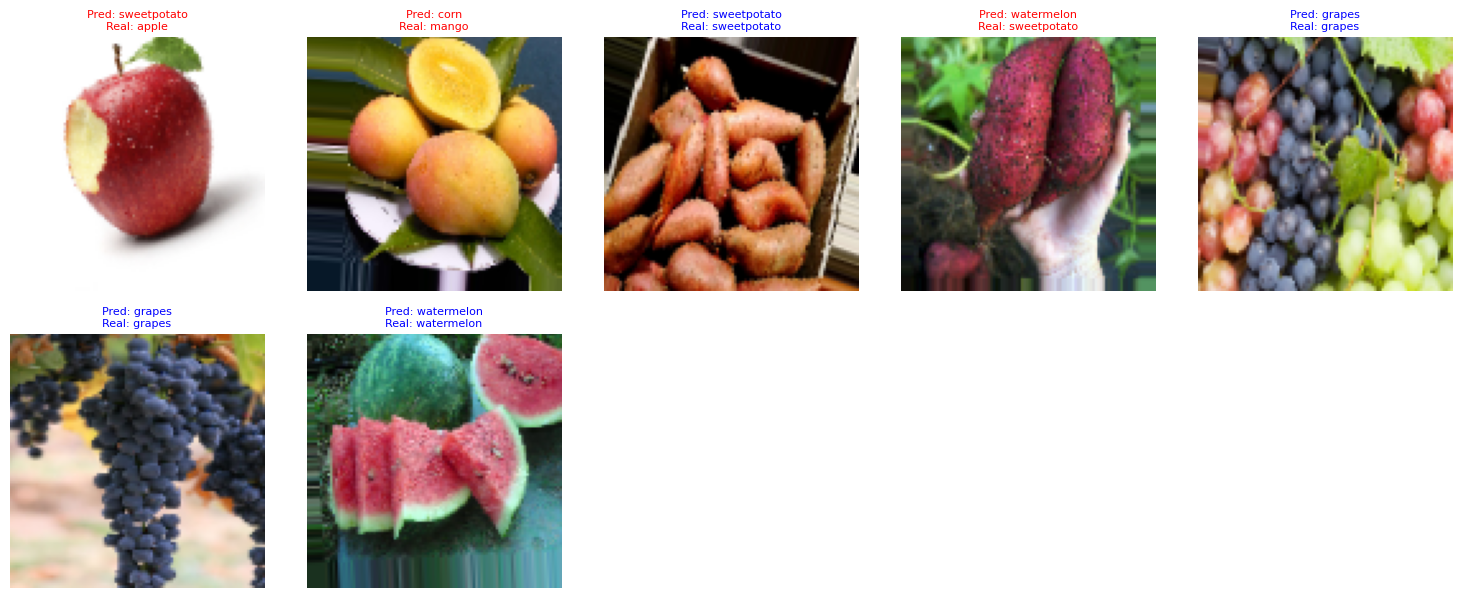

In [9]:
# Por último se mostrará una visualización de las predicciones obtenidas.
val_images, val_labels = next(val_gen)
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(15, 15))
for i in range(min(25, len(val_images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(val_images[i])
    color = 'blue' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f'Pred: {class_names[predicted_labels[i]]}\nReal: {class_names[true_labels[i]]}', color=color, fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
print(len(val_images))  # cuántas imágenes tiene el batch


7
